In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use('seaborn-notebook')

import warnings
warnings.filterwarnings('ignore')

background_color='rgb(248, 248, 255)'
from sklearn.linear_model import LinearRegression

/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-happiness-report/world-happiness-report.csv
/kaggle/input/population-by-country-2020/population_by_country_2020.csv


In [2]:
pastdf = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report.csv')
newdf = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')
population=pd.read_csv('../input/world-population-19602018/population_total_long.csv')


First we look at the data

In [3]:
print(pastdf.info())
print(newdf.info())
#pastdf.head()
#newdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB
None
<clas

In [4]:
#pastdf.describe()
#newdf.describe()

In [5]:
pastdf.rename(columns={'Country name': 'Country', 'Life Ladder':'Ladder score'}, inplace=True)
newdf.rename(columns={'Country name': 'Country'}, inplace=True)
population.rename(columns={'Country Name': 'Country'}, inplace=True)

In [6]:
pastdf.head(2)

,Country,year,Ladder score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.54,0.552,51.2,0.679,0.190,0.850,0.584,0.237


In [7]:
pastdf2 = pastdf.set_index('Country')
pastdf2.head(2)

,year,Ladder score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country,,,,,,,,,,
Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258
Afghanistan,2009,4.402,7.54,0.552,51.2,0.679,0.190,0.850,0.584,0.237


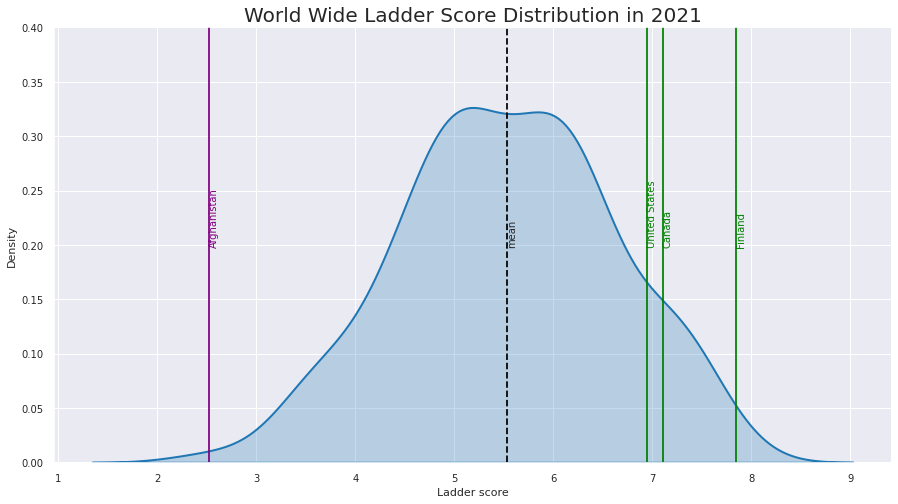

In [8]:
#Ladder Score Distribution by Regional Indicator¶
plt.figure(figsize = (15,8))
sns.kdeplot(newdf['Ladder score'], linewidth = 2, fill = True)
plt.axvline(newdf['Ladder score'].mean(), c='black',ls='--')
plt.text(newdf['Ladder score'].mean(), y=0.2, s='mean', rotation=90)
plt.axvline(newdf[newdf['Country']=='Finland']['Ladder score'].mean(), c='green')
plt.text(newdf[newdf['Country']=='Finland']['Ladder score'].mean(), y=0.2, s='Finland', c='green', rotation=90)
plt.axvline(newdf[newdf['Country']=='Afghanistan']['Ladder score'].mean(), c='purple')
plt.text(newdf[newdf['Country']=='Afghanistan']['Ladder score'].mean(), y=0.2, s='Afghanistan', c='purple', rotation=90)
plt.axvline(newdf[newdf['Country']=='Canada']['Ladder score'].mean(), c='green')
plt.text(newdf[newdf['Country']=='Canada']['Ladder score'].mean(), y=0.2, s='Canada', c='green', rotation=90)
plt.axvline(newdf[newdf['Country']=='United States']['Ladder score'].mean(), c='green')
plt.text(newdf[newdf['Country']=='United States']['Ladder score'].mean(), y=0.2, s='United States', c='green', rotation=90)
plt.ylim(0, .4)
plt.title('World Wide Ladder Score Distribution in 2021', fontsize=20, y=1)
plt.show()

In [9]:
fig = px.choropleth(newdf, locations='Country',
                    color='Ladder score',
                    locationmode='country names',
                    color_continuous_scale=px.colors.diverging.PRGn,
                   )
fig.update_layout(
    title_text='2021 World Happiness Scores',
    title_font_size=30,

    geo_showframe=False,
    paper_bgcolor='skyblue',
    geo_bgcolor='skyblue', 
)
fig.show()

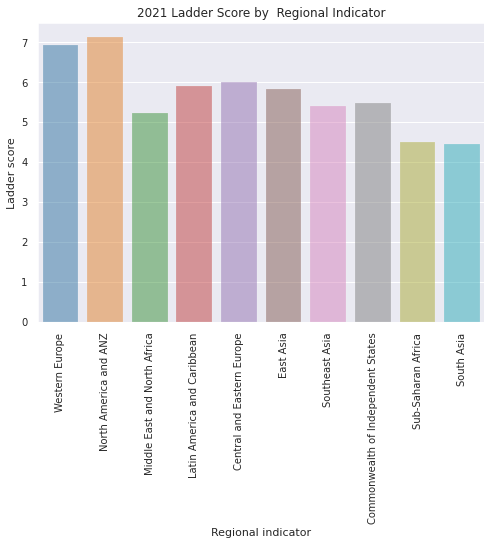

In [10]:
#Ladder score by Regional Indicator
sns.barplot(data=newdf, x='Regional indicator', y='Ladder score', estimator=np.mean, ci=None, alpha=.5)
plt.xticks(rotation = 90)
plt.title('2021 Ladder Score by  Regional Indicator')
plt.show()

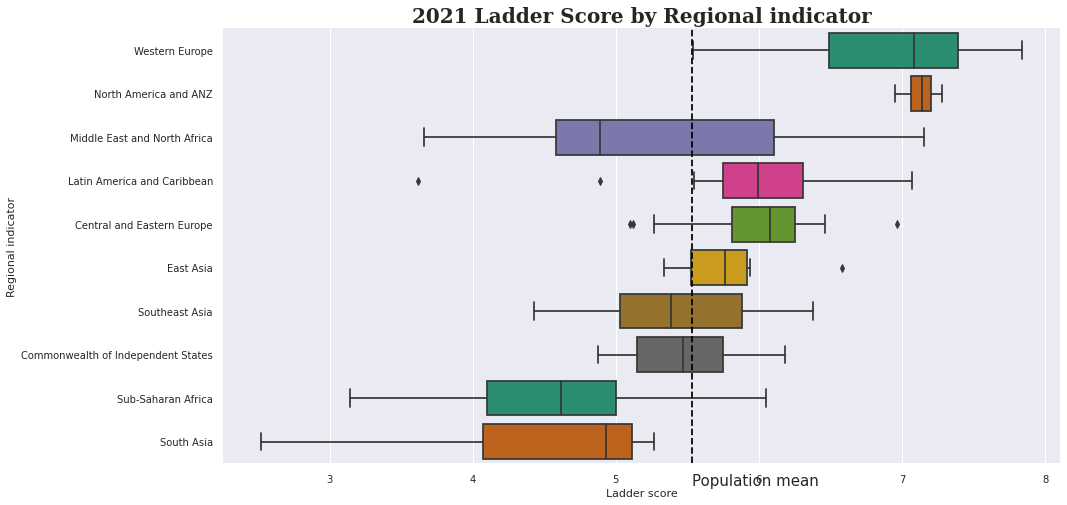

In [11]:
fig=plt.figure(figsize=(15,8))
plt.title("2021 Ladder Score by Regional indicator",family='Serif', weight='bold', size=20)
sns.boxplot(x=newdf['Ladder score'],y=newdf['Regional indicator'], palette='Dark2')
plt.axvline(newdf['Ladder score'].mean(), c='black',ls='--')
plt.text(x=newdf['Ladder score'].mean(),y=10,s='Population mean', size=15)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

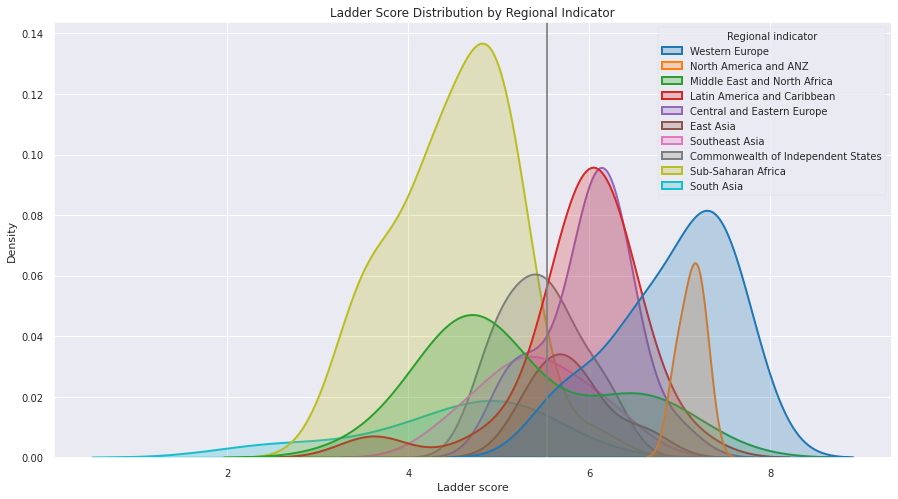

In [12]:
#Ladder Score Distribution by Regional Indicator¶
plt.figure(figsize = (15,8))
sns.kdeplot(newdf['Ladder score'], hue = newdf['Regional indicator'], linewidth = 2, fill = True)
plt.axvline(newdf['Ladder score'].mean(), color = 'gray')
plt.title('Ladder Score Distribution by Regional Indicator')
plt.show()

In [13]:
happiest2021 = newdf[['Country','Ladder score','Regional indicator']].sort_values(by='Ladder score', ascending=False)[:10]
unhappiest2021 = newdf[['Country','Ladder score','Regional indicator']].sort_values(by='Ladder score', ascending=True)[:10]

extremes=pd.concat([happiest2021,unhappiest2021]).sort_values(by='Ladder score', ascending=False)

extremes['Regional indicator'].value_counts()

Western Europe                  9
Sub-Saharan Africa              7
North America and ANZ           1
Middle East and North Africa    1
Latin America and Caribbean     1
South Asia                      1
Name: Regional indicator, dtype: int64

In [14]:
#print(list(extremes['Regional indicator'].unique()))
color_map={'Western Europe':'palegreen', 'Sub-Saharan Africa':'thistle', 'North America and ANZ':'gray',  'Middle East and North Africa':'gray', 'Latin America and Caribbean':'gray', 'South Asia':'gray'}
extremes['color']=extremes['Regional indicator'].map(color_map)


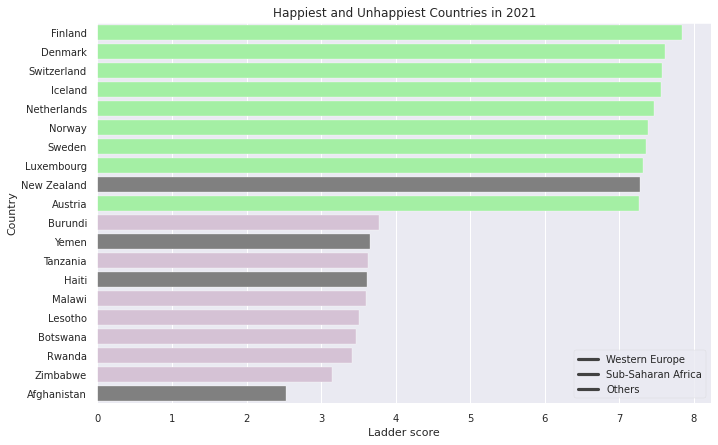

In [15]:
plt.figure(figsize=(11,7))
sns.barplot(x = 'Ladder score', 
            y = 'Country', 
            data=extremes, 
            palette=extremes['color'],
           )

plt.title("Happiest and Unhappiest Countries in 2021")
plt.legend({'Western Europe': 'green','Sub-Saharan Africa': 'violet', 'Others':'gray'})
plt.show()

In [16]:
fig = px.choropleth(pastdf, locations='Country',
                    color='Ladder score',
                    locationmode='country names',
                    color_continuous_scale=px.colors.diverging.PRGn,
                    animation_frame='year',
                   )
fig.update_layout(
    title_text='2021 World Happiness Scores',
    title_font_size=30,

    geo_showframe=False,
    paper_bgcolor='skyblue',
    geo_bgcolor='skyblue', 
)
fig.show()

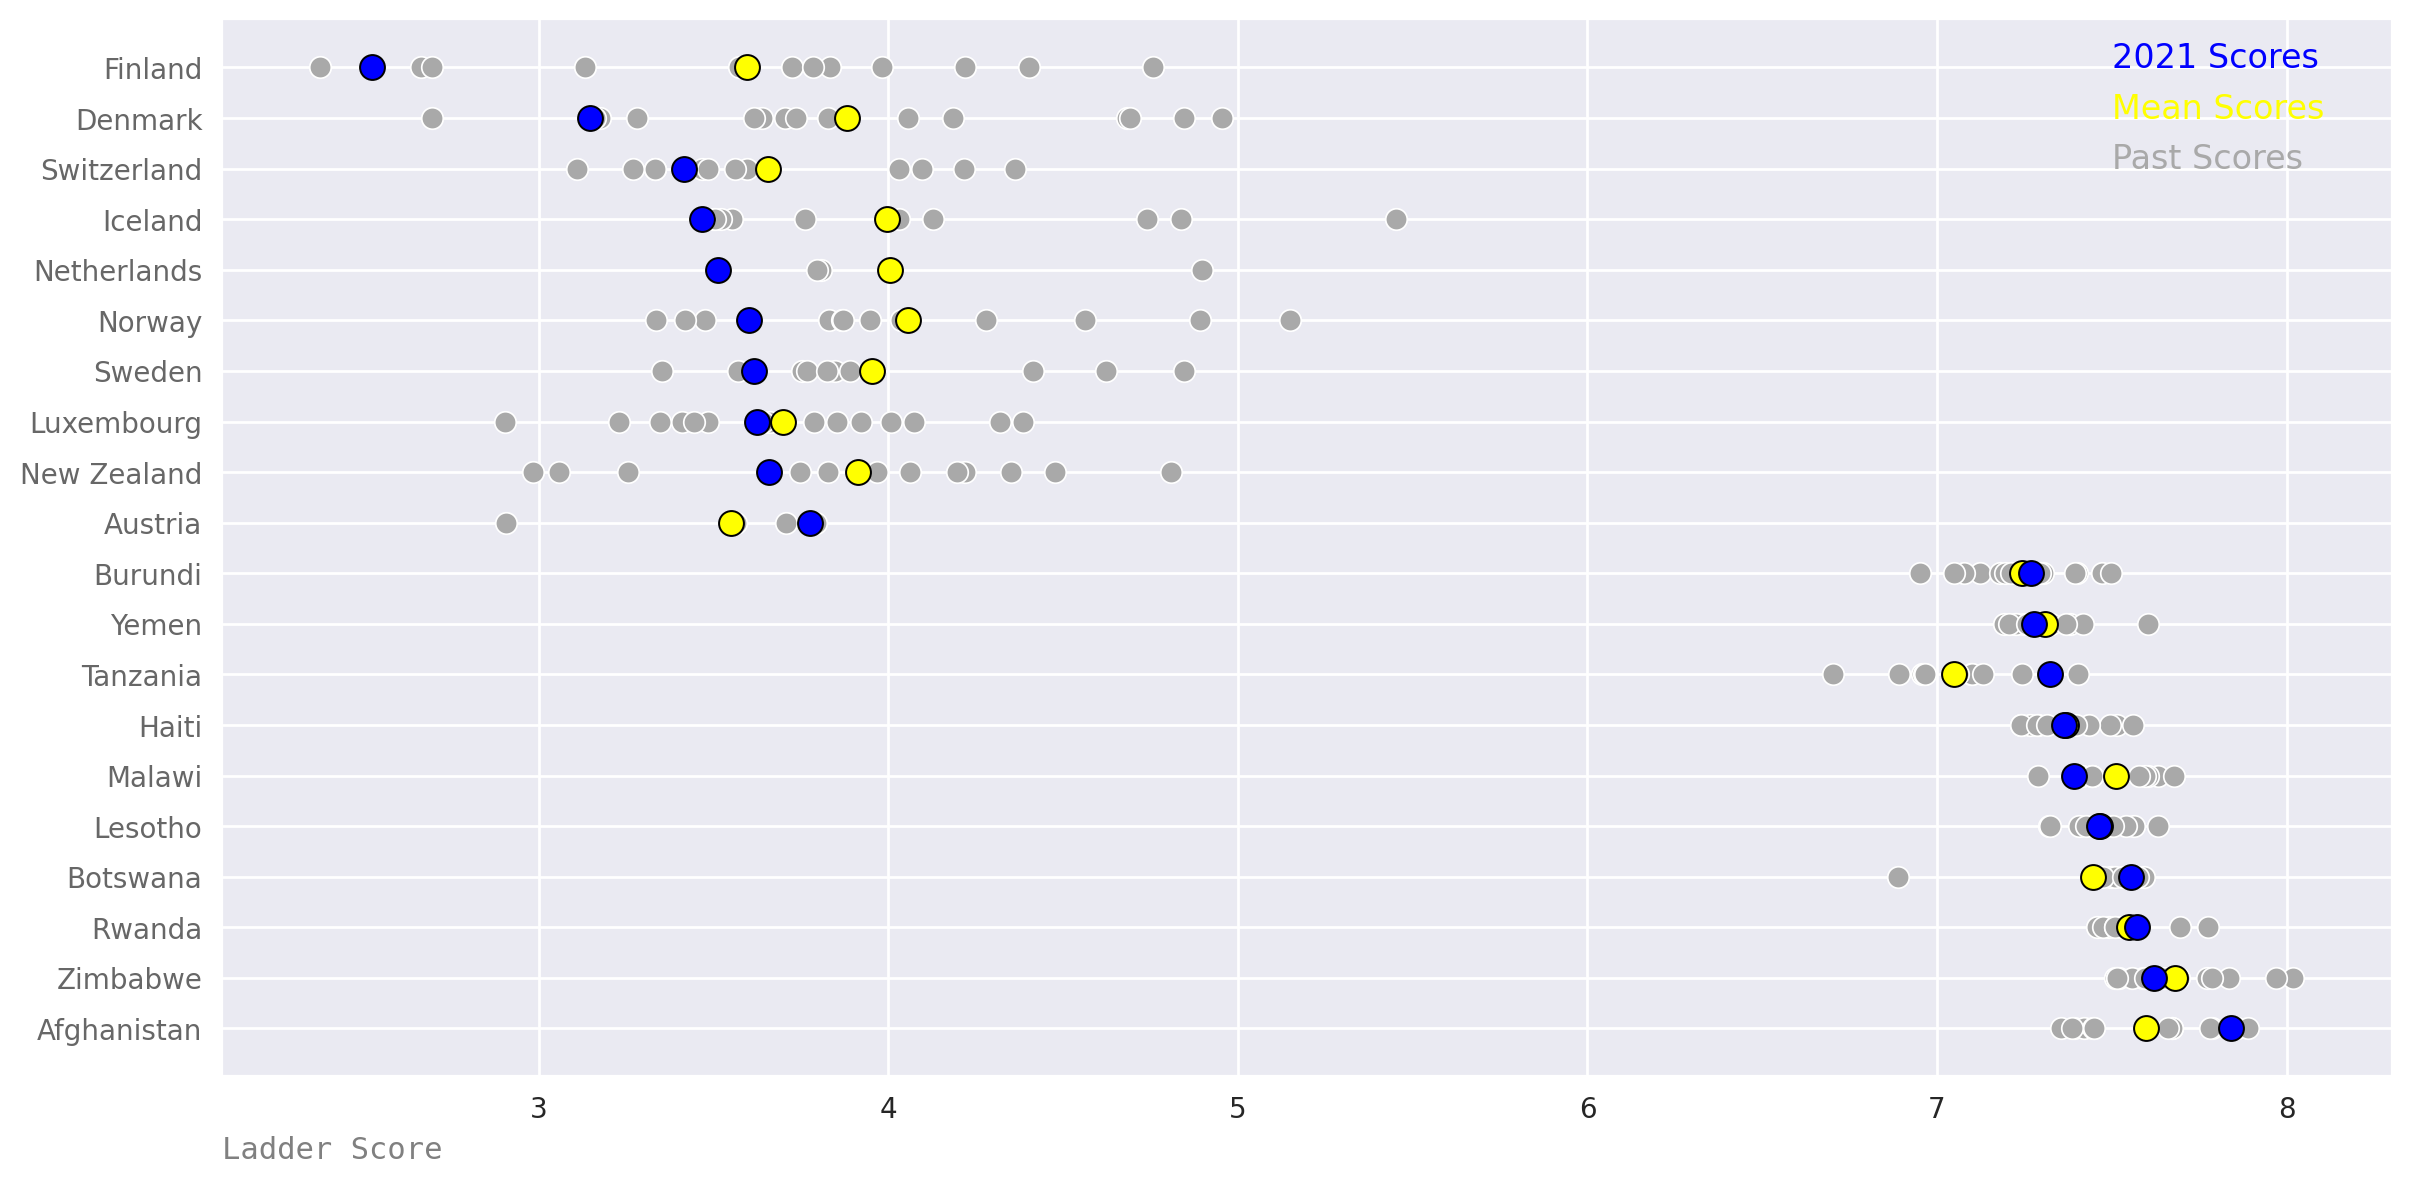

In [17]:

fig, ax = plt.subplots(1,1, figsize=(14, 7),dpi=200)

# Reduced list as too many to show all at once 
extreme_countries = list(extremes['Country'].unique())

y_start = 0
for country in extreme_countries:
    mean = pastdf[pastdf['Country'] == country].groupby('Country')['Ladder score'].mean()
    
    sns.scatterplot(data=pastdf[pastdf['Country'] == country], y=y_start, x='Ladder score',color='darkgray',s=60)
    sns.scatterplot(data=pastdf[pastdf['Country'] == country], y=y_start, x=mean,color='yellow',ec='black',s=80)
    sns.scatterplot(data=newdf[newdf['Country'] == country], y=y_start, x='Ladder score',color='blue',ec='black',s=80)   
    y_start += 1


ax.set_yticks(np.arange(len(extreme_countries)))
ax.set_yticklabels(extreme_countries[::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Happiness Index Score",fontfamily='monospace',loc='left',color='gray')

ax.set_axisbelow(True)
ax.set_xlabel( 'Ladder Score')

plt.annotate('2021 Scores', xy=(7.5, 19), fontsize=12, color='blue')
plt.annotate('Mean Scores', xy=(7.5, 18), fontsize=12, color='yellow')
plt.annotate('Past Scores', xy=(7.5, 17), fontsize=12, color='darkgrey')

plt.show()

In [18]:
fig = px.choropleth(population.sort_values('Year'), 
                    locations="Country", 
                    color='Count', 
                    locationmode='country names',
                    animation_frame='Year',
                    color_continuous_scale=px.colors.sequential.dense,
                   )
fig.update_layout(title='World population through the years', autosize=True)
fig.show() 

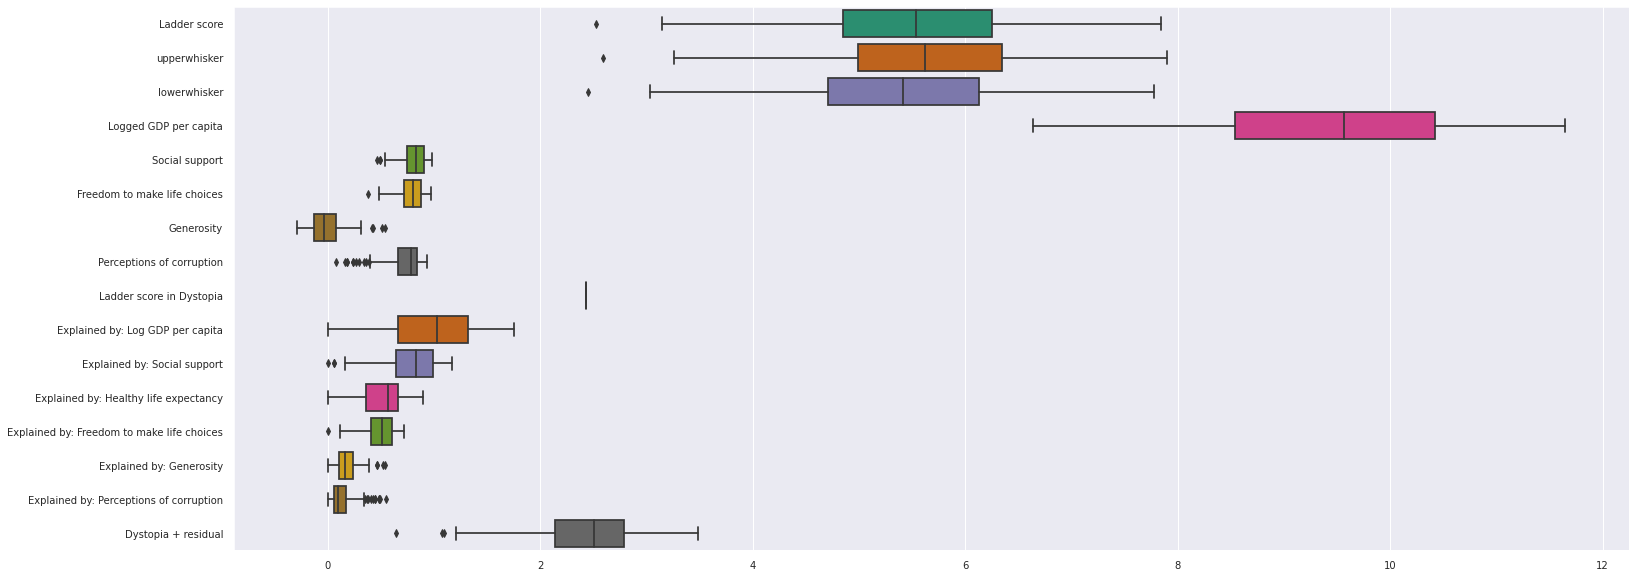

In [19]:
feature_data=newdf.drop(['Healthy life expectancy','Standard error of ladder score'], axis=1, inplace=False)
plt.figure(figsize=(25,10))
sns.boxplot(data = feature_data,
            orient = 'h', palette = 'Dark2')
plt.show()

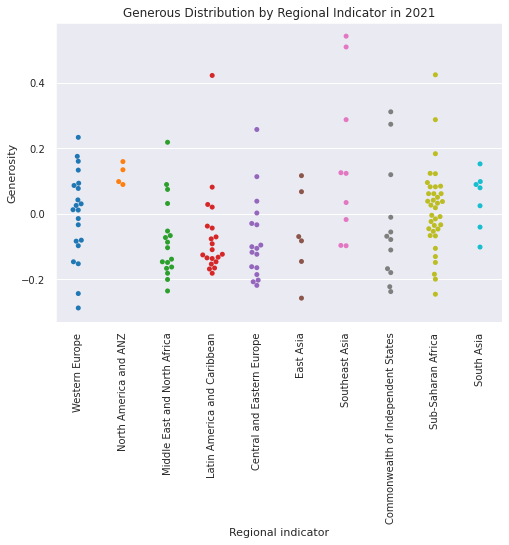

In [20]:
#Generous Distribution by Regional Indicator in 2021¶
sns.swarmplot(x = 'Regional indicator', y = 'Generosity', data = newdf)
plt.xticks(rotation = 90)
plt.title('Generous Distribution by Regional Indicator in 2021')
plt.show()

In [21]:
newdf.columns

Index(['Country', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

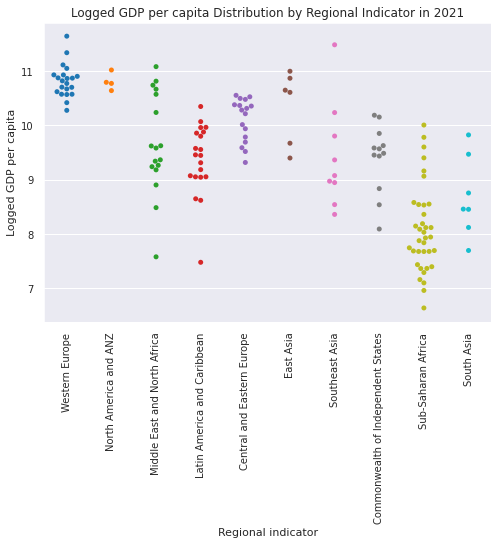

In [22]:
# Logged GDP per capita Distribution by Regional Indicator in 2021¶
sns.swarmplot(x = 'Regional indicator', y = 'Logged GDP per capita', data = newdf)
plt.xticks(rotation = 90)
plt.title('Logged GDP per capita Distribution by Regional Indicator in 2021')
plt.show()

In [23]:
ladder_score = newdf['Ladder score'].values.reshape(-1,1)
model = LinearRegression()
def plot_correlation(col):
    model.fit(ladder_score, newdf[col])

    y_range = np.linspace(ladder_score.min(), ladder_score.max(), 100)
    x_range = model.predict(y_range.reshape(-1, 1))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=newdf[col], y=newdf['Ladder score'],
                             mode='markers',
                             marker_color='green',
                             customdata=newdf['Country'],
                             marker_size=10,
                             name='Countries',
                             
                             ))
    fig.add_trace(go.Scatter(x=x_range, y=y_range,
                             name='Linear Regession',
                             line_color='blue',
                             line_width=3))

    fig.update_layout(title_text=f'Correlation between Ladder score and {col}',
                      paper_bgcolor=background_color,
                      plot_bgcolor=background_color,
                      xaxis_title_text=col,
                      yaxis_title_text='Ladder Score',
                      showlegend=False,
                      height=600, width=1000
                     )
    
    fig.show()


In [24]:
 #plot_correlation('Logged GDP per capita')

In [25]:
factors=['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
for i in range(len(factors)):
    ax=plot_correlation(factors[i])

<AxesSubplot:>

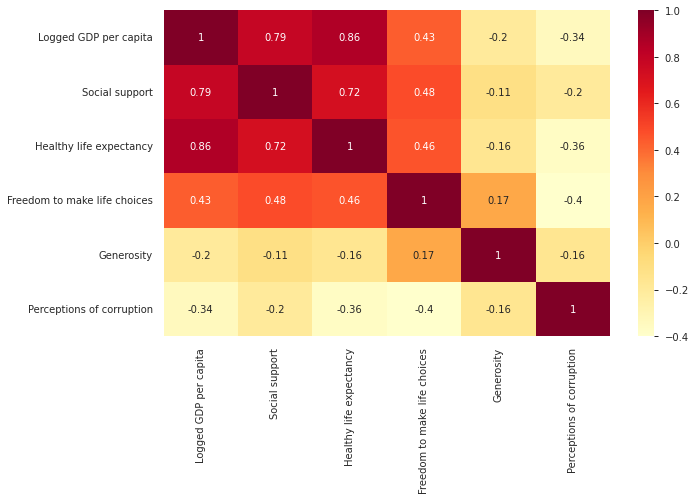

In [26]:
c2=newdf[factors].corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c2,annot=True,cmap="YlOrRd")